Импорт

In [144]:
import numpy as np
import pandas as pd
import seaborn as sb

Считываем файлы:

In [145]:
df_male = pd.read_csv('moscow_male.csv', sep=';', encoding='ansi', decimal=',')
df_female = pd.read_csv('moscow_female.csv', sep=';', encoding='ansi', decimal=',')

Проверяем:

In [146]:
print(df_male.head())
print()
print(df_female.head())


  ID       Name NumberOfPersons global_id  Year   Month  Unnamed: 6
0  1  Александр             253  37750243  2015  январь         NaN
1  2     Михаил             247  37750244  2015  январь         NaN
2  3       Иван             226  37750245  2015  январь         NaN
3  4     Максим             208  37750246  2015  январь         NaN
4  5      Артём             190  37750247  2015  январь         NaN

  ID       Name NumberOfPersons global_id  Year   Month  Unnamed: 6
0  1      Мария             252  37750254  2015  январь         NaN
1  2  Анастасия             224  37750255  2015  январь         NaN
2  3       Анна             190  37750256  2015  январь         NaN
3  4    Варвара             190  37750257  2015  январь         NaN
4  5   Виктория             186  37750258  2015  январь         NaN


Видим лишний (или запасной) столбец, выпиливаем его. При внимательном осмотре CSV-шника выявляется, что каждые 1000 записей дублируется строка заголовка. Выпиливаем эти строки. 

In [147]:
df_male = df_male.drop("Unnamed: 6", axis=1)
df_female = df_female.drop("Unnamed: 6", axis=1)

print(df_male.shape)
print(df_female.shape)


df_male = df_male[df_male["ID"] != "ID"]
df_female = df_female[df_female["ID"] != "ID"]

print(df_male.shape)
print(df_female.shape)

(4504, 6)
(4504, 6)
(4500, 6)
(4500, 6)


Проверяем:

In [148]:
print(df_male.head())
print()
print(df_female.head())

  ID       Name NumberOfPersons global_id  Year   Month
0  1  Александр             253  37750243  2015  январь
1  2     Михаил             247  37750244  2015  январь
2  3       Иван             226  37750245  2015  январь
3  4     Максим             208  37750246  2015  январь
4  5      Артём             190  37750247  2015  январь

  ID       Name NumberOfPersons global_id  Year   Month
0  1      Мария             252  37750254  2015  январь
1  2  Анастасия             224  37750255  2015  январь
2  3       Анна             190  37750256  2015  январь
3  4    Варвара             190  37750257  2015  январь
4  5   Виктория             186  37750258  2015  январь


## Задание №1
Создать новую колонку "Sex" и заполнить ее значениями по умолчанию для каждого набора данных (moscow_female.csv и moscow_male.csv).
### Решение:

In [149]:
df_male["Sex"] = "Male"
df_female["Sex"] = "Female"

## Задание №2
Объединить оба набора данных в один датафрейм (например , merge по полю "Year").
### Решение:

In [150]:
print(df_male.shape)
print(df_female.shape)

df = pd.concat([df_female, df_male], ignore_index=True)


print(df.describe())
print(df)

(4500, 7)
(4500, 7)
          ID   Name NumberOfPersons global_id  Year   Month     Sex
count   9000   9000            9000      9000  9000    9000    9000
unique  4500    374             312      9000     4      12       2
top        1  Мария               8  37750254  2015  январь  Female
freq       2     45             515         1  2400     800    4500
        ID       Name NumberOfPersons  global_id  Year     Month     Sex
0        1      Мария             252   37750254  2015    январь  Female
1        2  Анастасия             224   37750255  2015    январь  Female
2        3       Анна             190   37750256  2015    январь  Female
3        4    Варвара             190   37750257  2015    январь  Female
4        5   Виктория             186   37750258  2015    январь  Female
...    ...        ...             ...        ...   ...       ...     ...
8995  5396  Святослав               7  894568752  2018  сентябрь    Male
8996  5397     Даниль               7  894568785  2018  

## Задание №3
Выделить последнюю букву имени в именах мальчика или девочки.
### Решение:

In [151]:
df["Last_char"] = df["Name"].str[-1]
print(df.head())

  ID       Name NumberOfPersons global_id  Year   Month     Sex Last_char
0  1      Мария             252  37750254  2015  январь  Female         я
1  2  Анастасия             224  37750255  2015  январь  Female         я
2  3       Анна             190  37750256  2015  январь  Female         а
3  4    Варвара             190  37750257  2015  январь  Female         а
4  5   Виктория             186  37750258  2015  январь  Female         я


## Задание №4
Визуализировать зависимость последней буквы в имени от пола.

### Решение:

Last_char  Sex   
а          Female    2988
           Male       166
б          Female       1
           Male        45
в          Male       352
г          Male        45
д          Male       256
е          Female       5
и          Female       7
           Male        45
й          Male       860
к          Male        57
л          Male       233
м          Female      49
           Male       336
н          Female      37
           Male       882
п          Male        46
р          Male       718
с          Male       114
т          Male        95
у          Female       4
ф          Male        21
ь          Female      92
           Male       182
я          Female    1317
           Male        47
Name: ID, dtype: int64


<AxesSubplot:xlabel='Last_char', ylabel='count'>

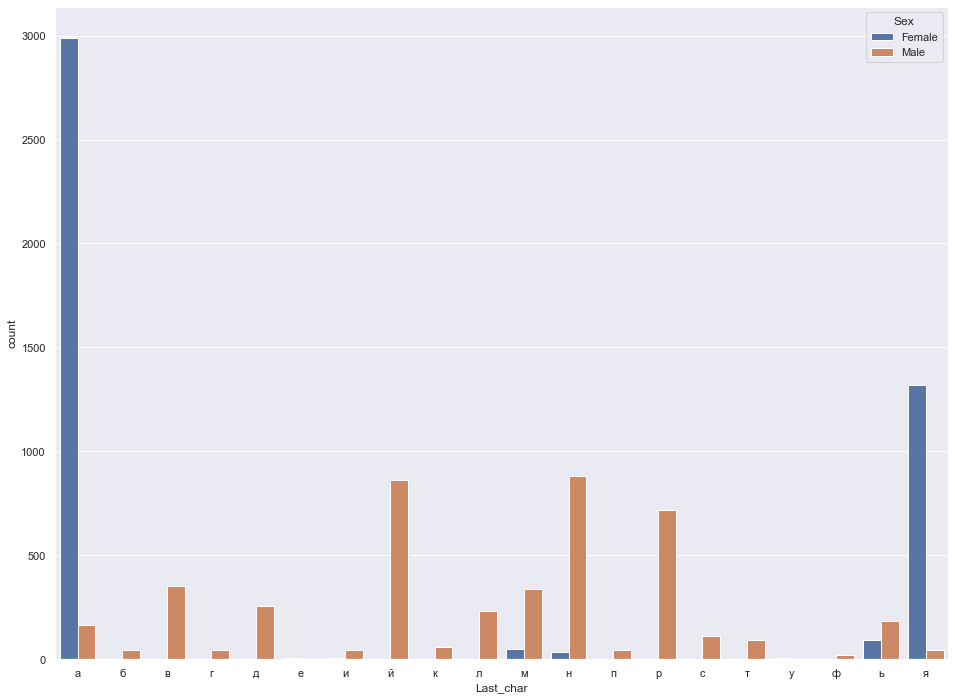

In [152]:
dfs = df.sort_values("Last_char")
print(dfs.groupby(["Last_char", "Sex"])["ID"].count())


sb.set(rc={"figure.figsize":(16, 12)})
sb.countplot(data = dfs, x = "Last_char", hue = "Sex")

## Задание №5
Написать функцию, которая на основе любого введеного имени, подбирает к нему обращение ("Г-жа" и "Г-дин").
### Решение:

In [153]:
from random import randint

In [162]:
# для начала можно искать имя в датасете, чтобы быть точно увереным в нем
# если не нашли, то уже смотреть на последнюю букву
# ну а потом можно и рандомно выдавать

grouped = dfs.groupby(["Last_char", "Sex"])["ID"].count()


def get_appeal(name):
    sex_from_df = df[df["Name"] == name]["Sex"].unique()
    if (sex_from_df.size != 0):
        print("Имя найдено в DataFrame")
        return sex_from_df[0]
    
    lc = name[-1]
    male_with_lc = grouped.get((lc, "Male"), default=0)
    female_with_lc = grouped.get((lc, "Female"), default=0)

    if (male_with_lc > female_with_lc):
        print("Определено по последней букве")
        return "Male"
    if (female_with_lc > male_with_lc):
        print("Определено по последней букве")
        return "Female"
    
    print("Черт его знает, пусть будет . . .")
    return "Male" if randint(0, 1) == 0 else "Female"



get_appeal("Улукбек")

Определено по последней букве


'Male'